# Handwritten digits, alphabets recognition

In [1]:
from emnist import extract_training_samples
from emnist import extract_test_samples
from emnist import list_datasets
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np
import cv2

# Load and Process data

In [3]:
# load train and test datasets
x00, y00 = extract_training_samples('mnist')
x01, y01 = extract_test_samples('mnist')
x10, y10 = extract_training_samples('letters')
x11, y11 = extract_test_samples('letters')

print(x00.shape, x01.shape, y00.shape, y01.shape)
print(x10.shape, x11.shape, y10.shape, y11.shape)

(60000, 28, 28)(10000, 28, 28)(60000,)(10000,)
(124800, 28, 28)(20800, 28, 28)(124800,)(20800,)


In [4]:
y10 = np.array([ i+9 for i in y10 ])
y11 = np.array([ i+9 for i in y11 ])

In [5]:
x_train = np.concatenate((x00, x10))
x_test  = np.concatenate((x01, x11))

y_train = np.concatenate((y00, y10))
y_test  = np.concatenate((y01, y11))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(184800, 28, 28)(30800, 28, 28)(184800,)(30800,)


In [6]:
# reshape data as per the needs
x_train = x_train.reshape(len(x_train),28,28,1) / 255
x_test  = x_test.reshape(len(x_test),28,28,1) / 255

# one-hot encoding
y_train = to_categorical(y_train).reshape(len(y_train),36)
y_test = to_categorical(y_test).reshape(len(y_test),36)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(184800, 28, 28, 1)(30800, 28, 28, 1)(184800, 36)(30800, 36)


# Convolution Neural Network Model

In [7]:
# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(36, activation='softmax'))

# Compile the model using accuracy metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Train and Save the model

In [9]:
history = model.fit(x_train, y_train, batch_size = 400, validation_data=(x_test, y_test), epochs=3)
model.save('handwritten_digits_alphabets_36125.h5')

ccuracy: 0.90 96400/184800 [==============>...............] - ETA: 1:40 - loss: 0.2517 - accuracy: 0.90 96800/184800 [==============>...............] - ETA: 1:40 - loss: 0.2518 - accuracy: 0.90 97200/184800 [==============>...............] - ETA: 1:39 - loss: 0.2517 - accuracy: 0.90 97600/184800 [==============>...............] - ETA: 1:39 - loss: 0.2516 - accuracy: 0.90 98000/184800 [==============>...............] - ETA: 1:39 - loss: 0.2514 - accuracy: 0.90 98400/184800 [==============>...............] - ETA: 1:38 - loss: 0.2510 - accuracy: 0.90 98800/184800 [===============>..............] - ETA: 1:38 - loss: 0.2510 - accuracy: 0.90 99200/184800 [===============>..............] - ETA: 1:37 - loss: 0.2510 - accuracy: 0.90 99600/184800 [===============>..............] - ETA: 1:37 - loss: 0.2512 - accuracy: 0.90100000/184800 [===============>..............] - ETA: 1:36 - loss: 0.2510 - accuracy: 0.90100400/184800 [===============>..............] - ETA: 1:36 - loss: 0.2510 - accuracy: 0

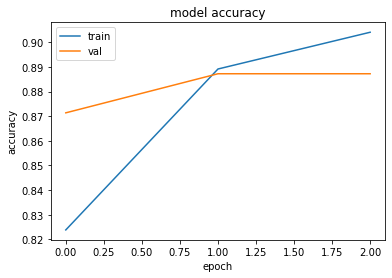

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()